- ### Planteamiento del problema:

¿Qué tipo de usuario tiene mayor probabilidad de hacerse parte de un depósito a largo plazo?

In [2]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
dataframe = pd.read_csv(url, sep = ';')

- ### Exploración y limpieza de datos:

In [3]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 41188 | Columnas: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  co

In [4]:
dataframe.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
print(dataframe.head(2))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  

[2 rows x 21 columns]


In [6]:
dataframe.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las clases.
- Hay 41.188 registros y 21 clases incluyendo la clase a predecir.
- Hay 11 variables categóricas y 10 numéricas.

In [7]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 12 registros duplicados.
El % de registros "duplicados" es 0.0002913469942701758.


In [8]:
# Se eliminan los registros duplicados

dataframe.drop_duplicates(inplace = True)

print(f'Se eliminaron {filas-(dataframe.shape[0])} duplicados')

Se eliminaron 12 duplicados


Inicialmente todas las clases parecen relevantes respecto a la variable a predecir. Es por ello que no se eliminará ninguna.

- ### Análisis univariante:

##### Para variables categóricas

/tmp/ipykernel_1134/2112555418.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1134/2112555418.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


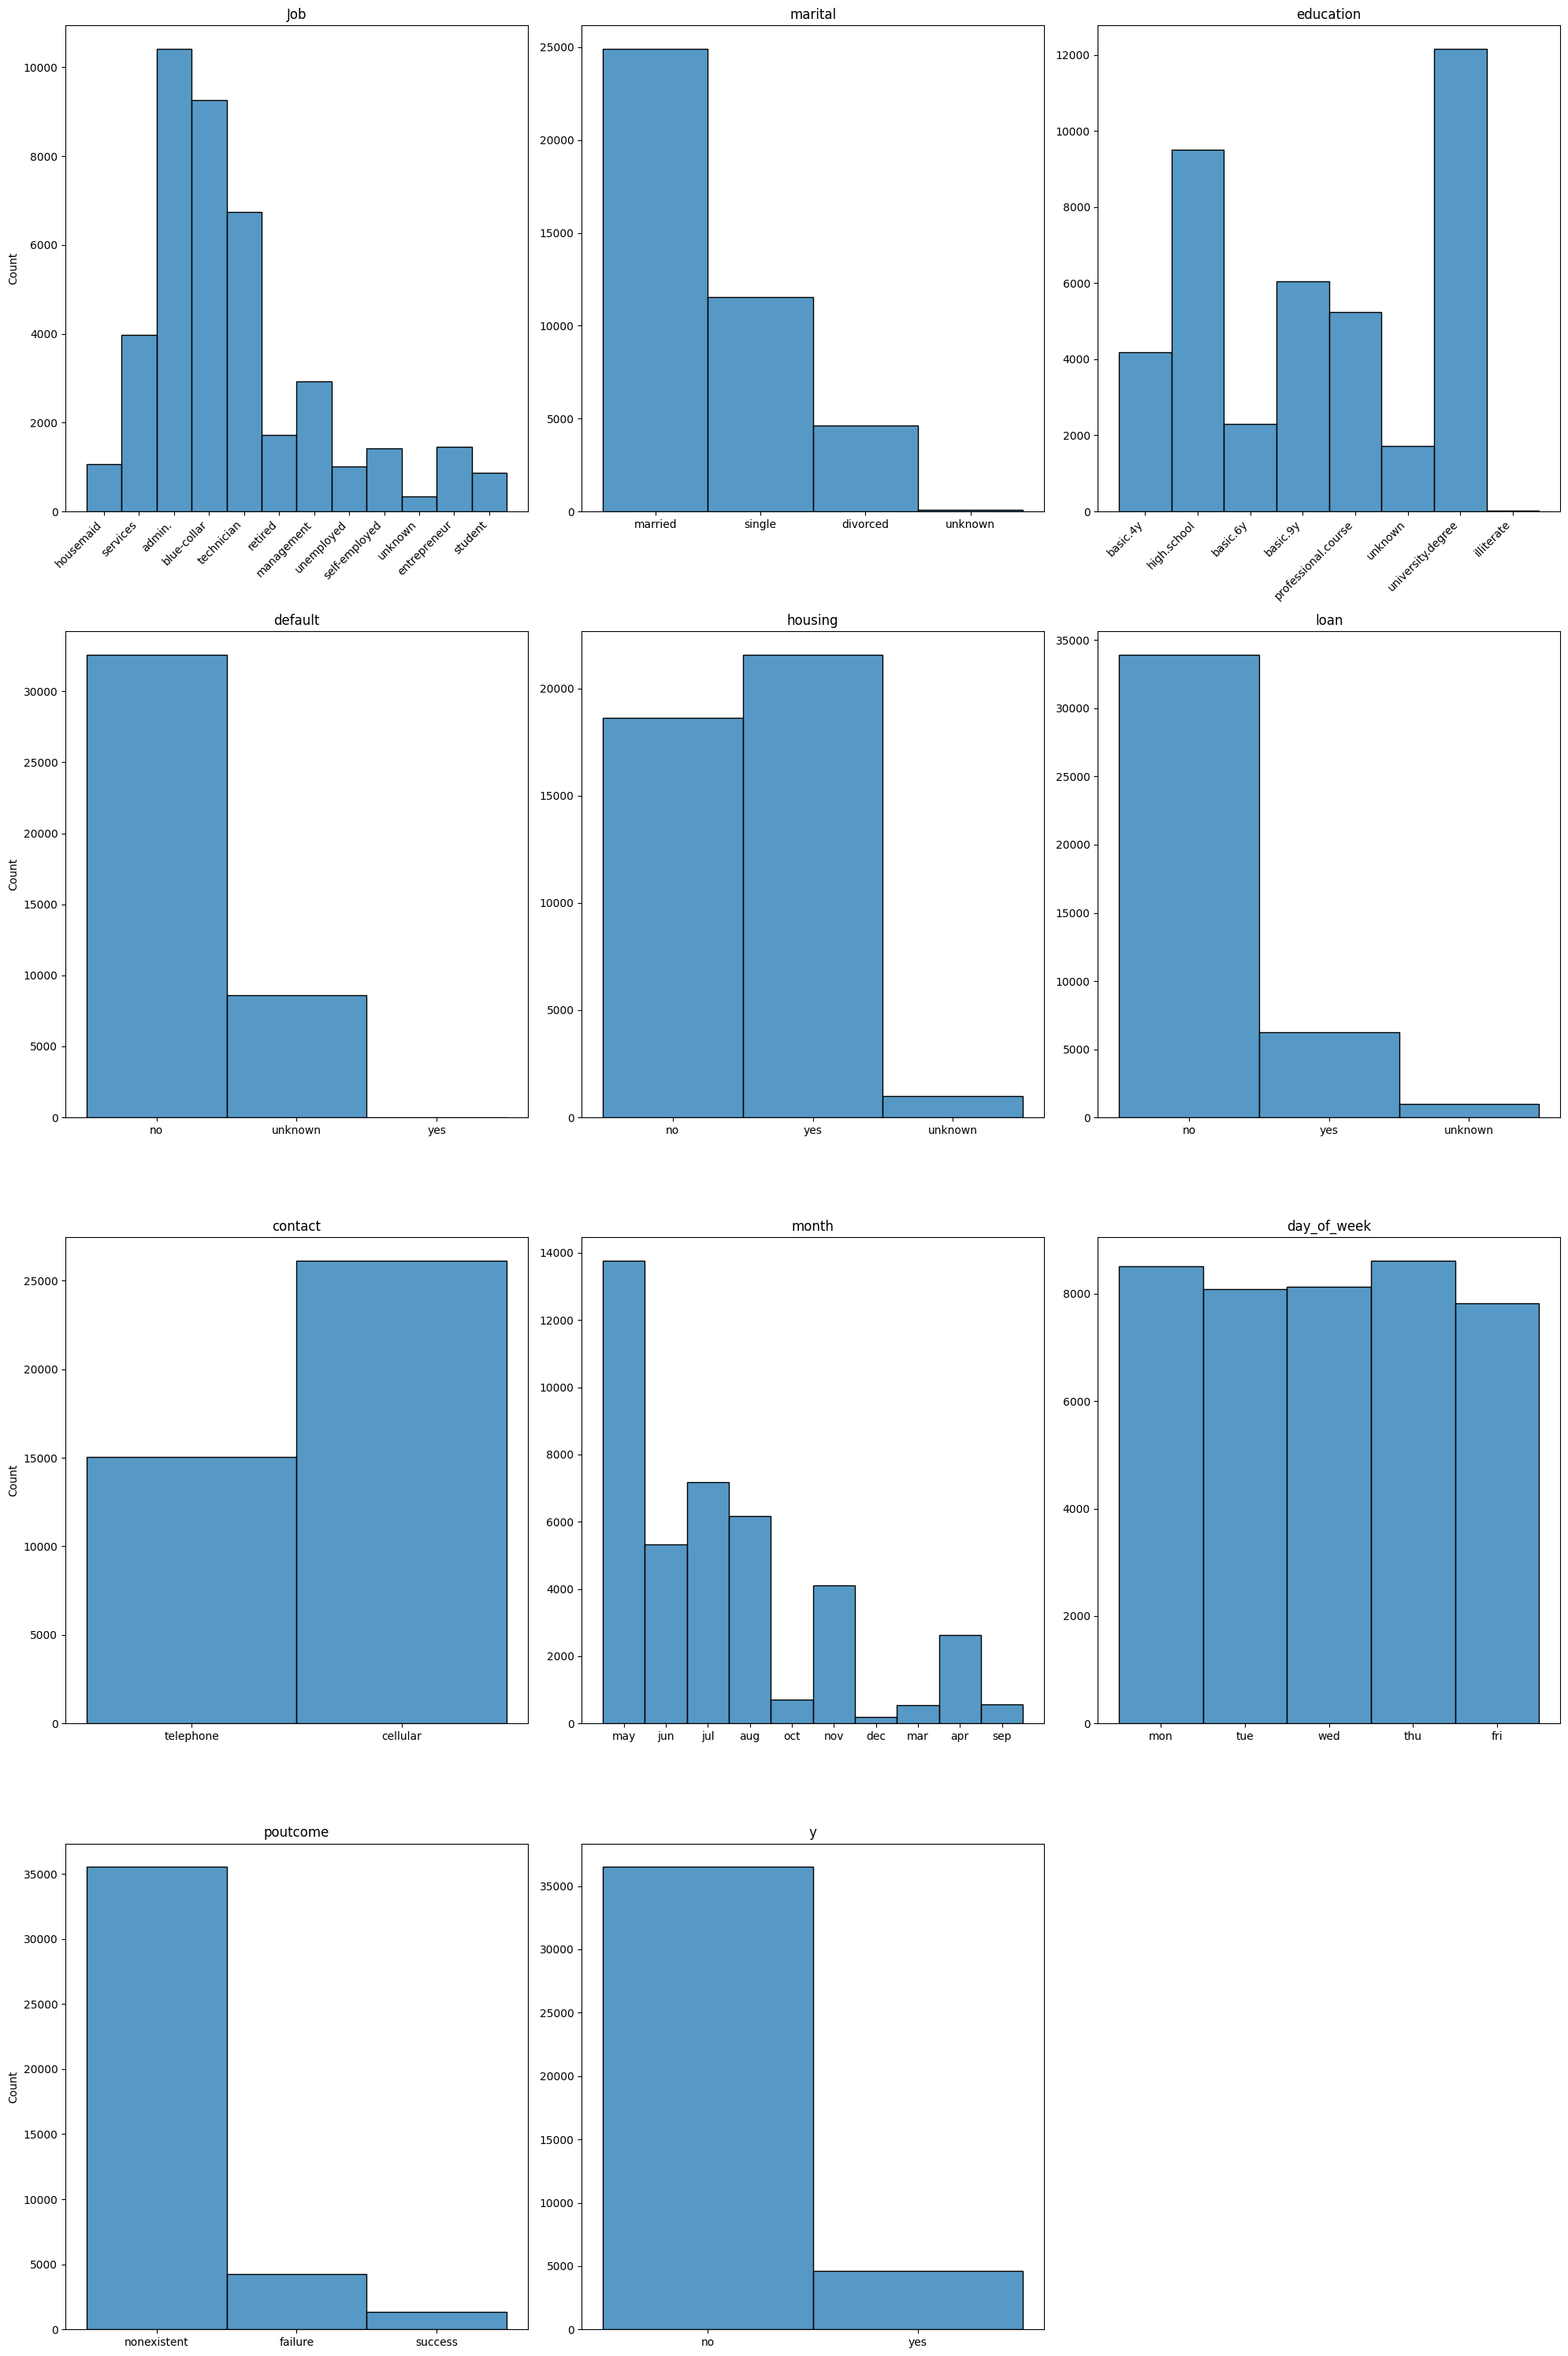

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4,3, figsize = (20, 30))

sns.histplot(ax = axis[0, 0], data = dataframe, x = 'job').set(xlabel = None, title = 'Job')
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax = axis[0, 1], data = dataframe, x = 'marital').set(ylabel = None, xlabel = None, title = 'marital')
sns.histplot(ax = axis[0, 2], data = dataframe, x = 'education').set(ylabel = None, xlabel = None, title = 'education')
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')


sns.histplot(ax = axis[1, 0], data = dataframe, x = 'default').set(xlabel = None, title = 'default')
sns.histplot(ax = axis[1, 1], data = dataframe, x = 'housing').set(ylabel = None, xlabel = None, title = 'housing')
sns.histplot(ax = axis[1, 2], data = dataframe, x = 'loan').set(ylabel = None, xlabel = None, title = 'loan')

sns.histplot(ax = axis[2, 0], data = dataframe, x = 'contact').set(xlabel = None, title = 'contact')
sns.histplot(ax = axis[2, 1], data = dataframe, x = 'month').set(ylabel = None, xlabel = None, title = 'month')
sns.histplot(ax = axis[2, 2], data = dataframe, x = 'day_of_week').set(ylabel = None, xlabel = None, title = 'day_of_week')

sns.histplot(ax = axis[3, 0], data = dataframe, x = 'poutcome').set(xlabel = None, title = 'poutcome')
sns.histplot(ax = axis[3, 1], data = dataframe, x = 'y').set(ylabel = None, xlabel = None, title = 'y')

fig.delaxes(axis[3, 2])

plt.tight_layout()

plt.show()

In [10]:
credito_yes = dataframe[dataframe['default']=='yes']['default'].value_counts().get('yes', 0)
print(f"La cantidad de clientes sin crédito vigente es {credito_yes}")

La cantidad de clientes sin crédito vigente es 3


In [11]:
loan_no = dataframe[dataframe['loan']=='no']['loan'].value_counts().get('no', 0)
loan_yes = dataframe[dataframe['loan']=='yes']['loan'].value_counts().get('yes', 0)
print(f"La relación entre los que no tienen crédito personal y los que lo tienen es de {round(loan_no/loan_yes,2)}")

La relación entre los que no tienen crédito personal y los que lo tienen es de 5.43


In [12]:
poutcome_failure = dataframe[dataframe['poutcome']=='failure']['poutcome'].value_counts().get('failure', 0)
poutcome_success = dataframe[dataframe['poutcome']=='success']['poutcome'].value_counts().get('success', 0)
print(f"La relación entre los que resultó un fracaso la campaña y los que resultó un "
      f"éxito fue de {round(poutcome_failure/poutcome_success,2)}")

La relación entre los que resultó un fracaso la campaña y los que resultó un éxito fue de 3.1


- Los trabajos más populares son admin., blue-collar, technician y services. El top 3 de trabajos más populares tienen el doble o más de personas.
- La mayoría están casados, luego vienen los solteros y por último los divorciados.
- El top 3 de educación es university.degree, high-school y basic-9y de más popular a menos popular.
- La gran mayoría de los clientes no tienen créditos vigentes, sólo tres tienen créditos vigentes.
- La mayoría tiene préstamo para casa y un poco menos no lo tienen.
- Los que no tienen crédito personal son alrededor 5.4 veces que los que tienen.
- El contacto con la mayoría es vía celular.
- La inmensa mayoría fue contactado por última vez en el mes de mayo.
- Está muy parejo los días de la semana en que ocurrió el último contacto.
- En la mayoría de los casos no había campaña de marketing previa. Y para los que existió campaña previa los fracasos fueron el triple que los éxitos.
- La inmensa mayoría de los clientes no optaron por un depósito a largo plazo.

##### Para variables numéricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspa

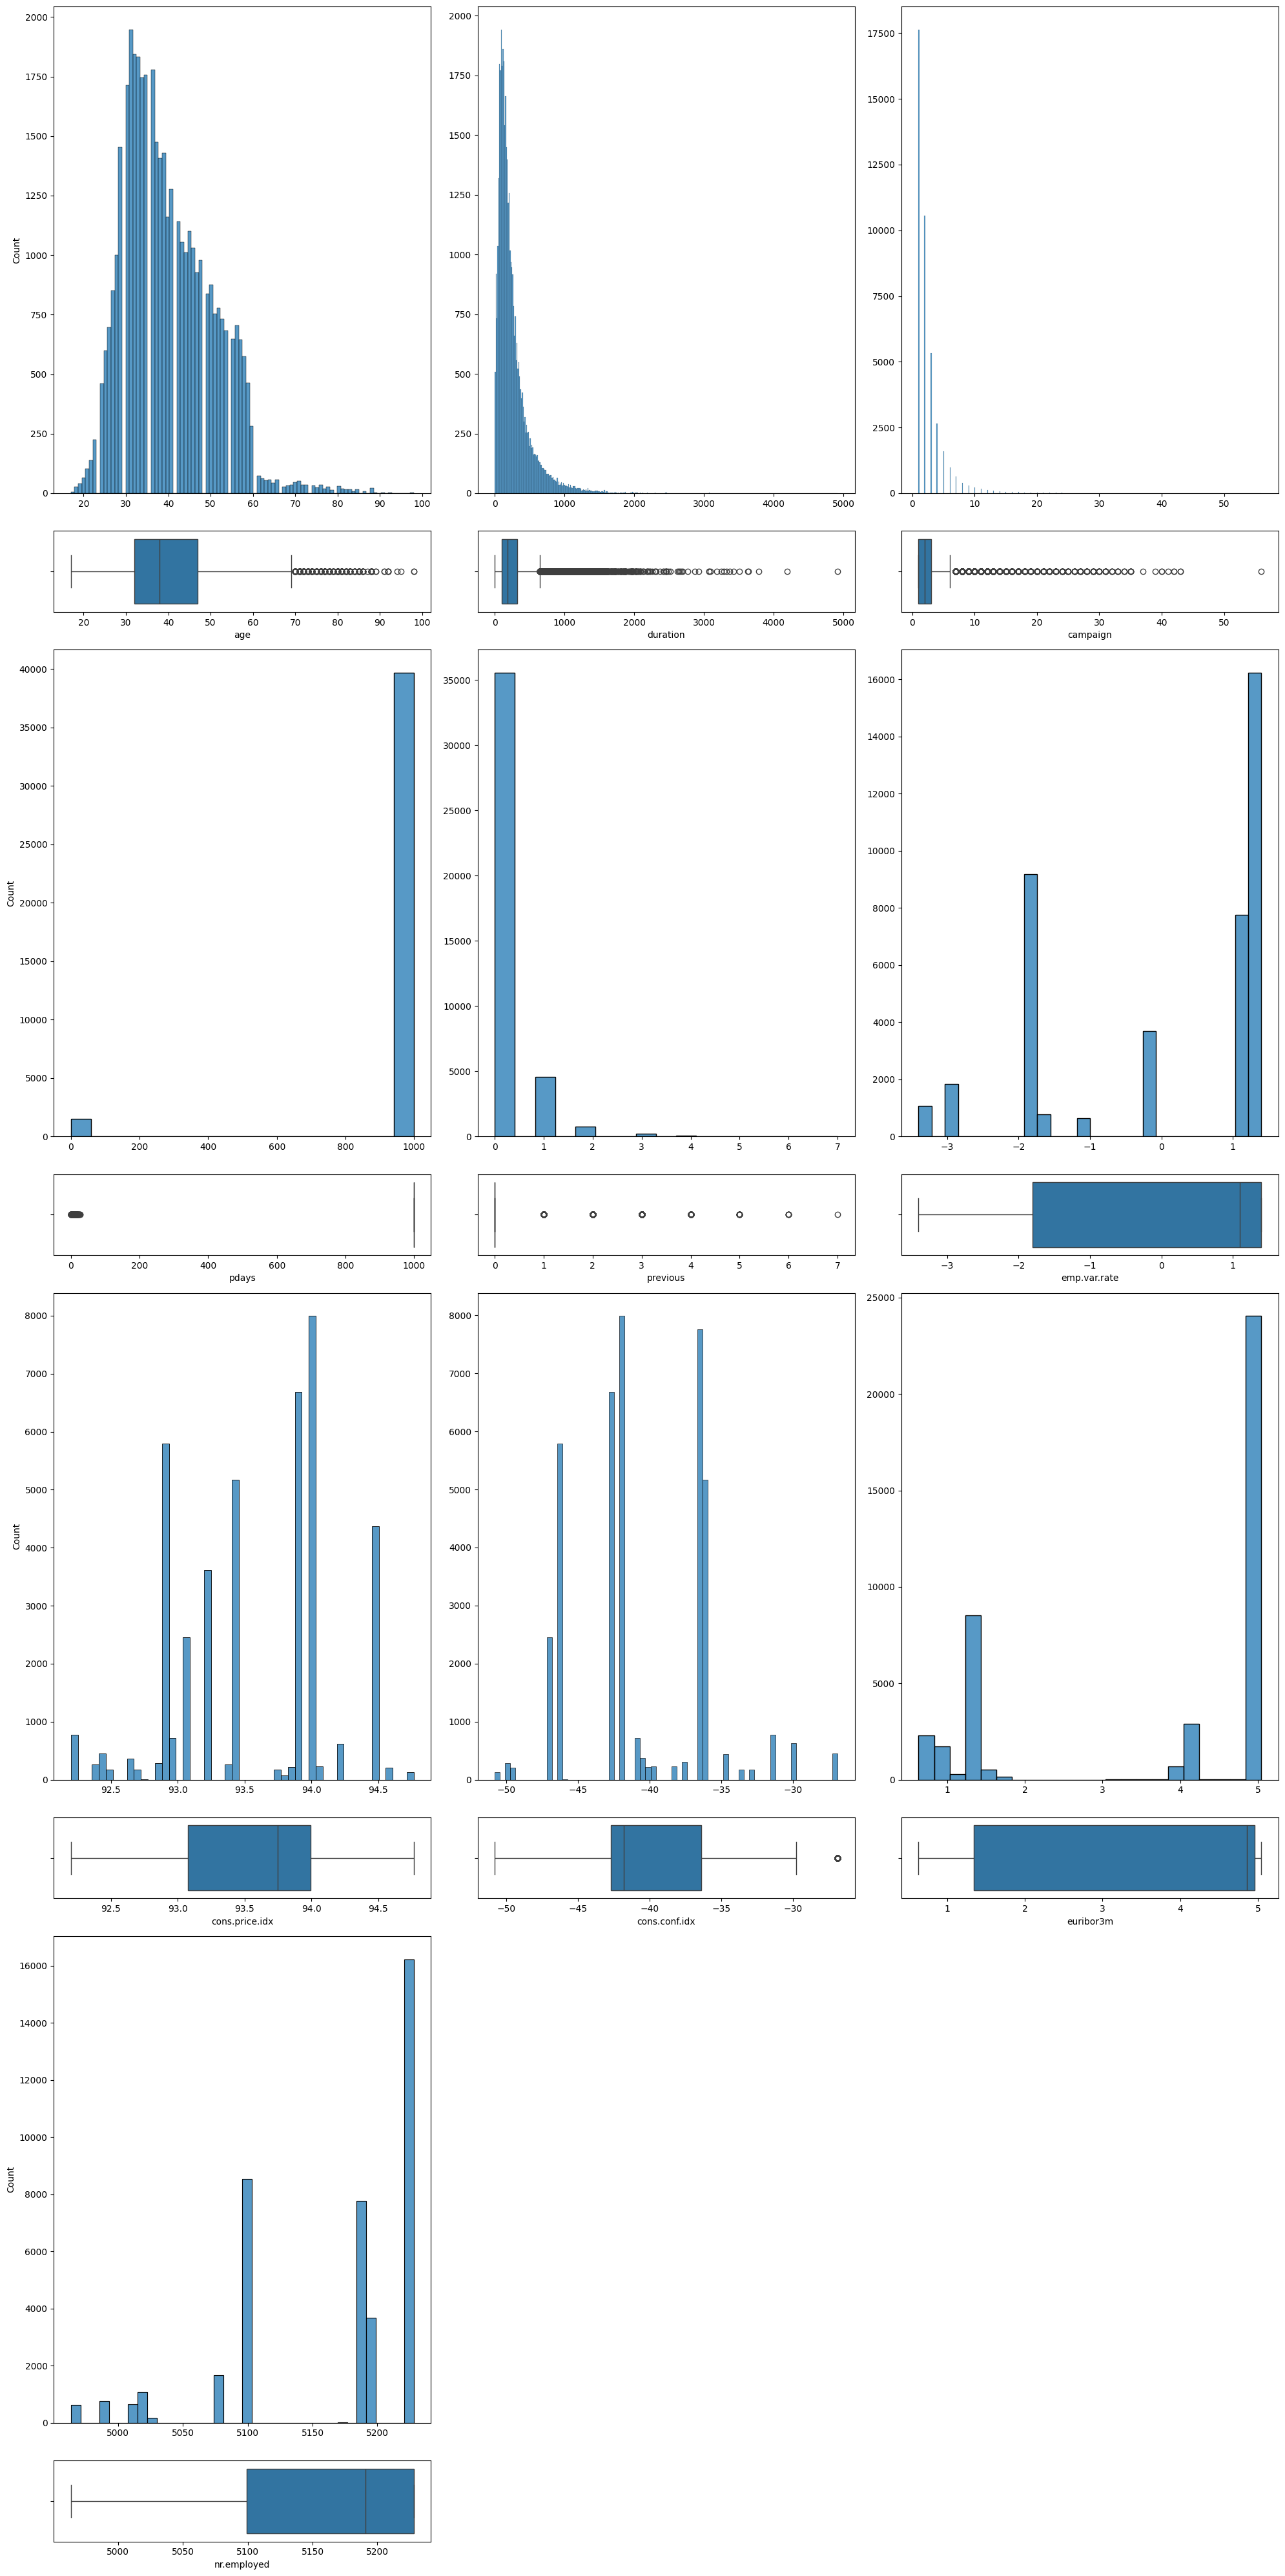

In [13]:
fig, axis = plt.subplots(8, 3, figsize = (20,40), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'age')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'duration').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'duration')

sns.histplot(ax = axis[0,2], data = dataframe, x = 'campaign').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = dataframe, x = 'campaign')

####

sns.histplot(ax = axis[2,0], data = dataframe, x = 'pdays').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'pdays')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'previous').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'previous')

sns.histplot(ax = axis[2,2], data = dataframe, x = 'emp.var.rate').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,2], data = dataframe, x = 'emp.var.rate')

####

sns.histplot(ax = axis[4,0], data = dataframe, x = 'cons.price.idx').set(xlabel = None)
sns.boxplot(ax = axis[5,0], data = dataframe, x = 'cons.price.idx')

sns.histplot(ax = axis[4,1], data = dataframe, x = 'cons.conf.idx').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,1], data = dataframe, x = 'cons.conf.idx')

sns.histplot(ax = axis[4,2], data = dataframe, x = 'euribor3m').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,2], data = dataframe, x = 'euribor3m')

####

sns.histplot(ax = axis[6,0], data = dataframe, x = 'nr.employed').set(xlabel = None)
sns.boxplot(ax = axis[7,0], data = dataframe, x = 'nr.employed')

subplots_remove = [axis[6, 1], axis[7, 1], axis[6, 2], axis[7, 2]]

for ax in subplots_remove:

    fig.delaxes(ax)

plt.tight_layout()

plt.show()

- La distribución de las edades es relativamente simétrica aunque con cierto sesgo hacia la izquierda como es normal. A partir de los 60 años en adelante, se reduce de forma importante el número de clientes contactados, por lo que se generan valores atípicos.
- La inmensa mayoría de los últimos contactos duraron menos de 1000 segundos.
- Durante esta campaña, a la gran mayoría se le contactó menos de 10 veces.
- En la mayoría de los casos transcurrieron 1000 días desde la última campaña hasta que fue contactado.
- A la gran mayoría no se le había realizado ningún contacto durante la campaña anterior.

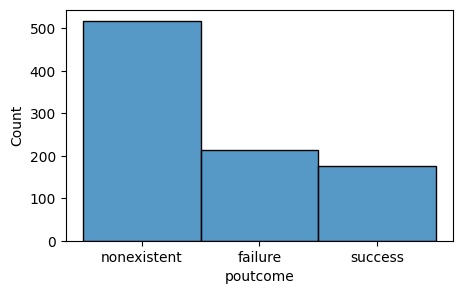

In [14]:
mayores_60 = dataframe.query("age > 60")['poutcome']

plt.figure(figsize = (5,3))
sns.histplot(data = mayores_60)
plt.show()

Contrario a lo que se esperaba según hipótesis personal, no existe una diferencia marcada entre éxitos y fracasos de la campaña anterior entre la población mayor a 60 años.

In [15]:
dataframe.query("poutcome == 'nonexistent'")['previous'].value_counts()

previous
0    35551
Name: count, dtype: int64

A partir de una hipótesis personal, queda demostrado que para los clientes que no existen resultados de la campaña de marketing anterior, es porque nunca fueron contactatos, y no porque sea un dato faltante.

In [16]:
dataframe.query("default == 'unknown'")['previous'].value_counts()

previous
0    8021
1     523
2      44
3       6
4       2
Name: count, dtype: int64

In [17]:
dataframe.query("marital == 'unknown'")['previous'].value_counts()

previous
0    62
1    14
2     4
Name: count, dtype: int64

In [18]:
dataframe.query("housing == 'unknown'")['previous'].value_counts()

previous
0    851
1    110
2     18
3      7
4      4
Name: count, dtype: int64

In [19]:
dataframe.query("loan == 'unknown'")['previous'].value_counts()

previous
0    851
1    110
2     18
3      7
4      4
Name: count, dtype: int64

No se puede asumir algo similar para los valores unknown de loan, default, marital y housing. Además se necesitaría conocer del negocio a profundidad para comprender el origen de estos datos y qué significan. No pueden asumirse en primera instancia como datos faltantes, puede que simplemente sean etiquetas para reportar que el cliente no quiso dar dicha información.

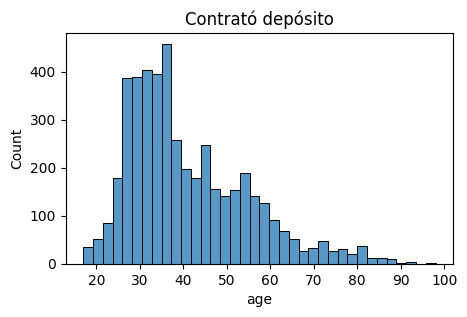

In [24]:
exitos_edad = dataframe.query("y == 'yes'")['age']

plt.figure(figsize = (5,3))
sns.histplot(data = exitos_edad).set(title = 'Contrató depósito')
plt.show()

Aprox. entre 25 y 45 años, se acumula la mayoría de los clientes que contratan un depósito a largo plazo.

- ### Análisis multivariante:

##### Para categóricas

In [26]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_1134/3110999583.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a le

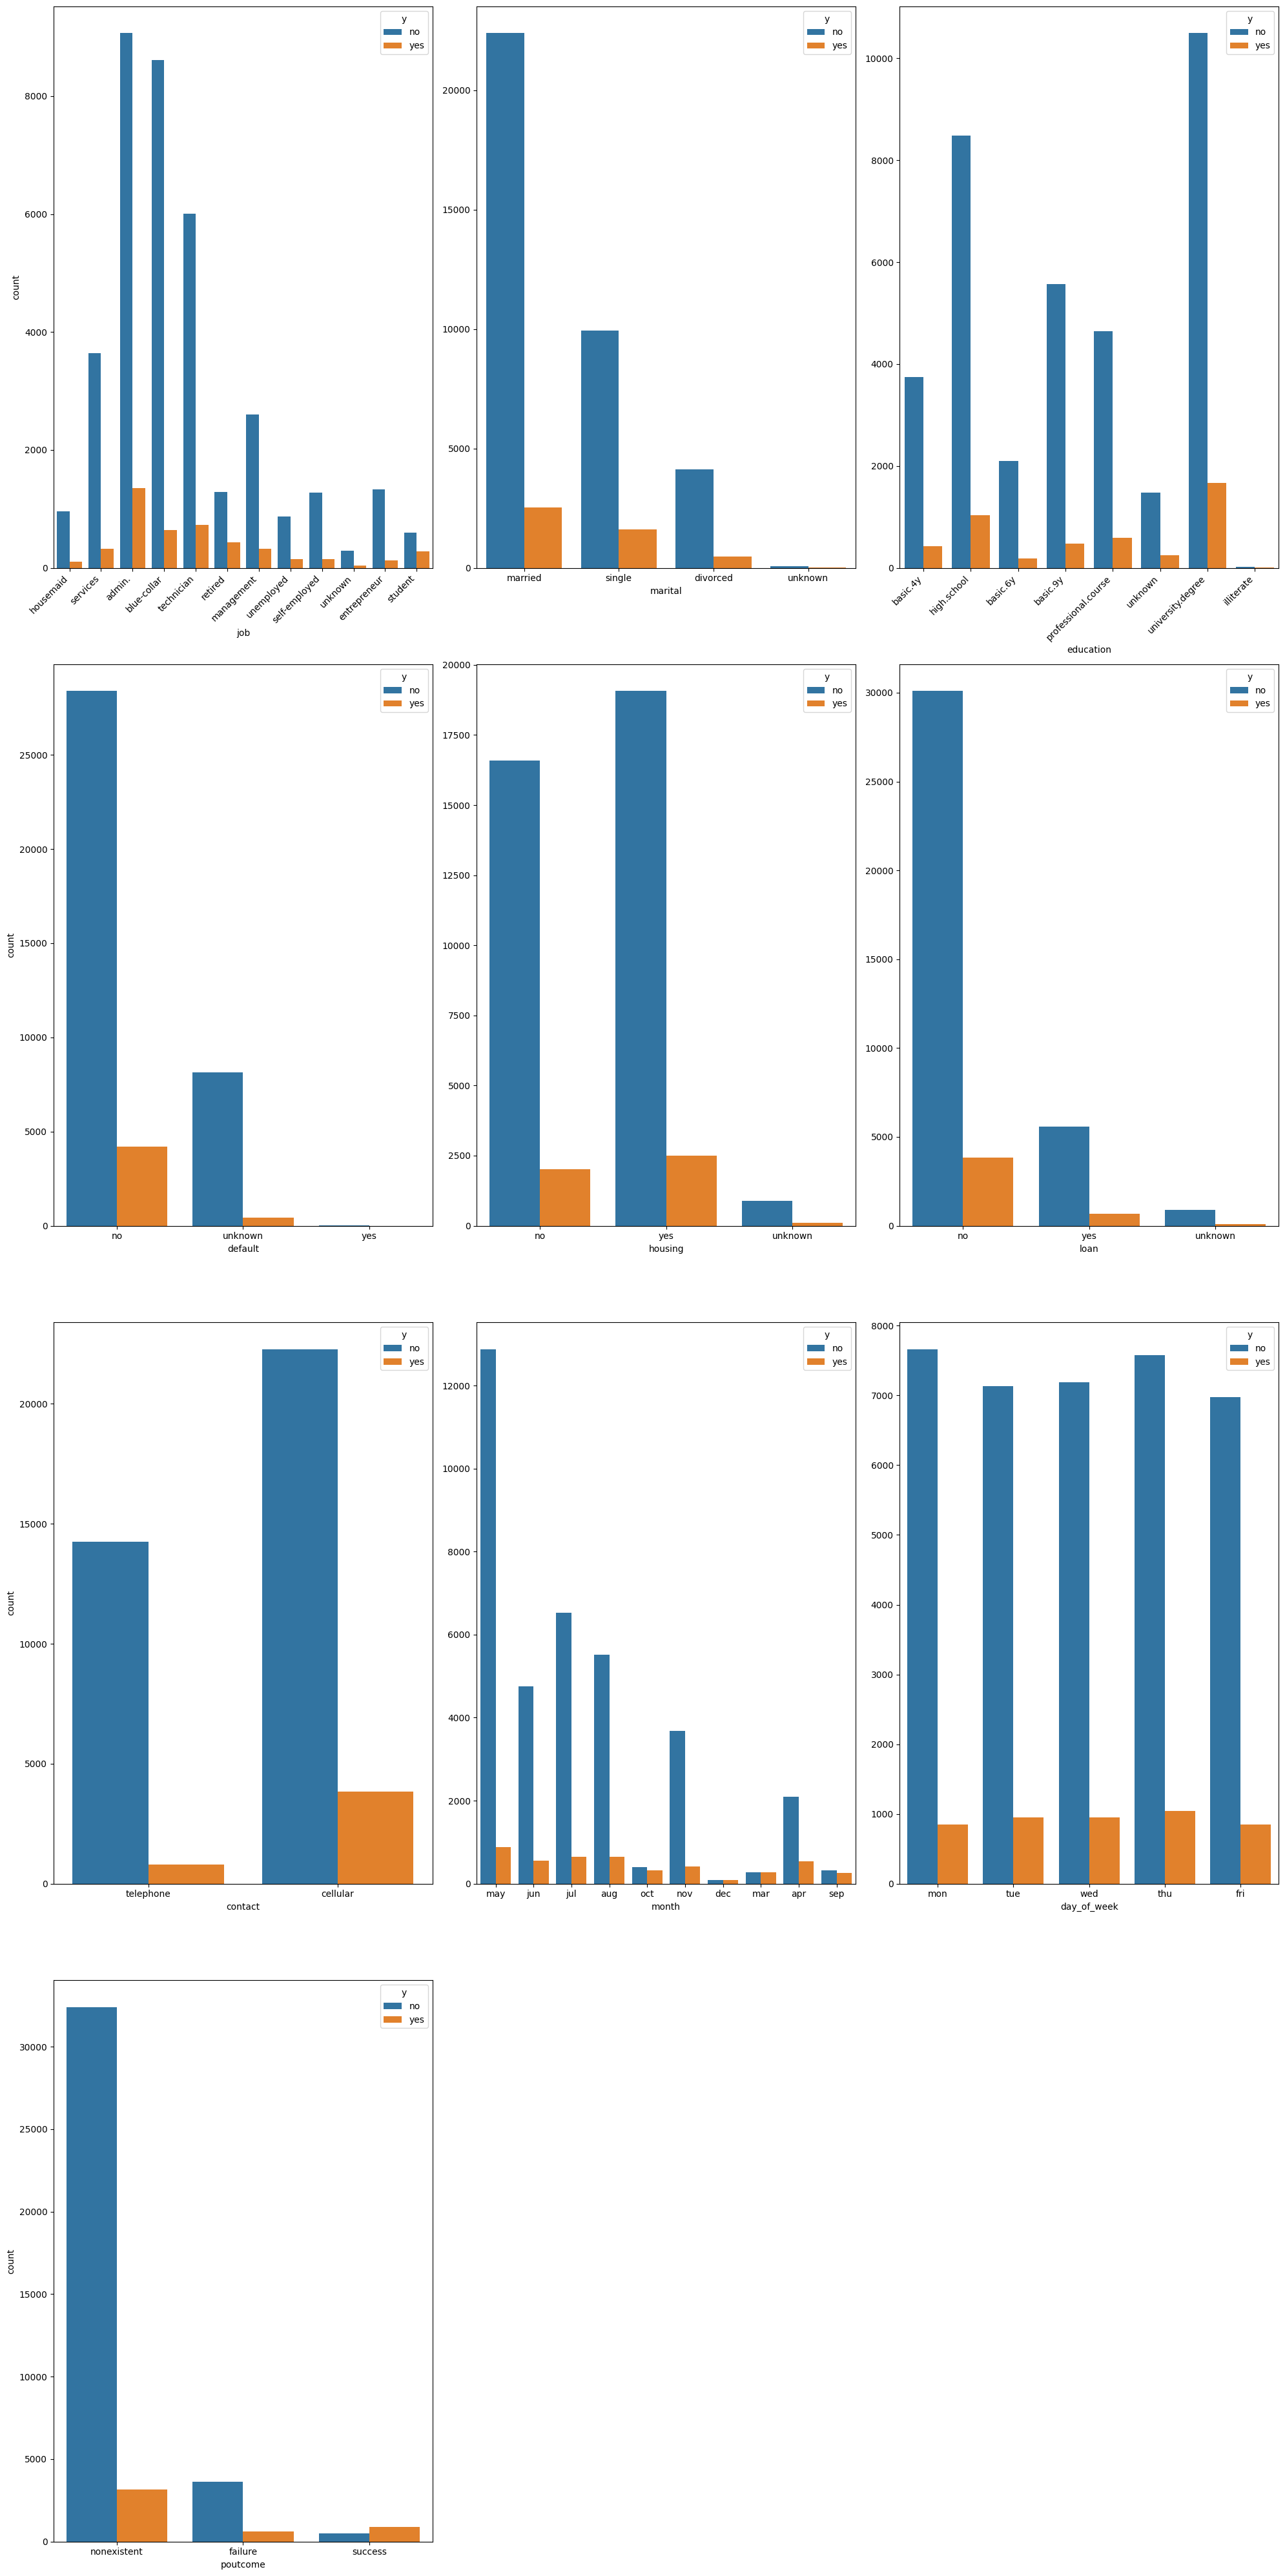

In [28]:
fig, axis = plt.subplots(4, 3, figsize = (20,40))

sns.countplot(ax = axis[0,0], data = dataframe, x = 'job', hue = 'y')
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[0,1], data = dataframe, x = 'marital', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[0,2], data = dataframe, x = 'education', hue = 'y').set(ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')

####

sns.countplot(ax = axis[1,0], data = dataframe, x = 'default', hue = 'y')
sns.countplot(ax = axis[1,1], data = dataframe, x = 'housing', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[1,2], data = dataframe, x = 'loan', hue = 'y').set(ylabel = None)

####

sns.countplot(ax = axis[2,0], data = dataframe, x = 'contact', hue = 'y')
sns.countplot(ax = axis[2,1], data = dataframe, x = 'month', hue = 'y').set(ylabel = None)
sns.countplot(ax = axis[2,2], data = dataframe, x = 'day_of_week', hue = 'y').set(ylabel = None)

####

sns.countplot(ax = axis[3,0], data = dataframe, x = 'poutcome', hue = 'y')

subplots_remove2 = [axis[3, 1], axis[3, 2]]

for ax in subplots_remove2:

    fig.delaxes(ax)

plt.tight_layout()

plt.show()


- No existe ninguna clase para la cual el número de personas que hayan contratado el depósito de largo plazo, sea mayor que los que no lo hayan contratado.
- El mes que tiene peor relación entre servicio no contratado y contratado es Mayo.
- No existe diferencia importante para la relación de servicio contratado y no contratado entre los días de la semana.
- Via telefónica es una peor relación para los servicios contratados, respecto a via celular.
- 